# **Análise Exploratória de Dados Bancários com SQL**

## **Explorando insights financeiros por meio de consultas no AWS Athena**

## **Resumo**
Este estudo apresenta uma análise exploratória de dados (EDA) de clientes bancários com foco na relação entre atributos demográficos, transações financeiras e limites de crédito. A investigação foi conduzida usando SQL no AWS Athena, aproveitando dados armazenados no Amazon S3. Os resultados fornecem insights úteis para tomadas de decisão no setor financeiro, incluindo segmentação de clientes e políticas de concessão de crédito.

---

## **Introdução**

O uso de SQL para análise de grandes volumes de dados é uma prática essencial em diversos setores, especialmente no financeiro. Este trabalho tem como objetivo explorar e identificar padrões no comportamento dos clientes bancários a partir de um conjunto de dados real. 

**Objetivos do estudo:**
1. Entender a distribuição demográfica e financeira dos clientes.
2. Avaliar a relação entre atributos como renda, limite de crédito e tipo de cartão.
3. Identificar padrões que possam influenciar tomadas de decisão estratégicas.

---

## **Metodologia**

Os dados analisados do arquivo credit.csv foram estruturados no Amazon S3 e consultados por meio do AWS Athena. A tabela criada contém as seguintes colunas:

| Coluna                 | Descrição                                      |
|------------------------|-----------------------------------------------|
| idade                 | Idade do cliente                             |
| sexo                  | Gênero do cliente (F ou M)                  |
| dependentes           | Número de dependentes                        |
| escolaridade          | Nível de escolaridade                        |
| estado_civil          | Estado civil                                  |
| salario_anual         | Faixa salarial                                |
| tipo_cartao           | Tipo de cartão                                |
| qtd_produtos          | Produtos adquiridos nos últimos 12 meses      |
| iteracoes_12m         | Transações realizadas nos últimos 12 meses   |
| meses_inativo_12m     | Meses inativos nos últimos 12 meses          |
| limite_credito        | Limite de crédito do cliente                 |
| valor_transacoes_12m  | Valor das transações nos últimos 12 meses   |
| qtd_transacoes_12m    | Quantidade de transações nos últimos 12 meses|

A tabela foi criada utilizando o seguinte comando:

```sql
CREATE EXTERNAL TABLE IF NOT EXISTS default.credito (
  `idade` int,
  `sexo` string,
  `dependentes` int,
  `escolaridade` string,
  `estado_civil` string,
  `salario_anual` string,
  `tipo_cartao` string, 
  `qtd_produtos` bigint,
  `iteracoes_12m` int,
  `meses_inativo_12m` int,
  `limite_credito` float,
  `valor_transacoes_12m` float,
  `qtd_transacoes_12m` int 
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
  'serialization.format' = ',',
  'field.delim' = ','
) LOCATION 's3://<your-bucket-location>'
TBLPROPERTIES ('has_encrypted_data'='false');
```

---

## **Exploração dos Dados**

### **1. Quantidade de Registros**
Para determinar o tamanho do dataset, utilizamos a seguinte query:

```sql
SELECT COUNT(*) FROM credito;
```
**Resultado:**

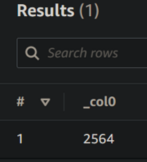

Total de 2.564 registros.

Execute o código e verifique se a tabela foi criada com sucesso, você verá informações como abaixo na tela:

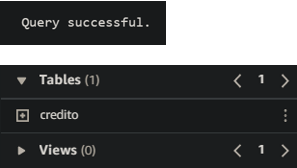

Para visualizar a tabela clique em "Visualizar tabela"

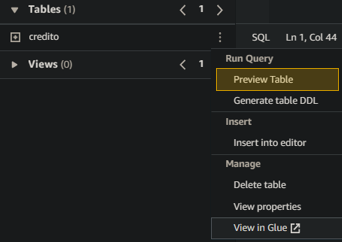

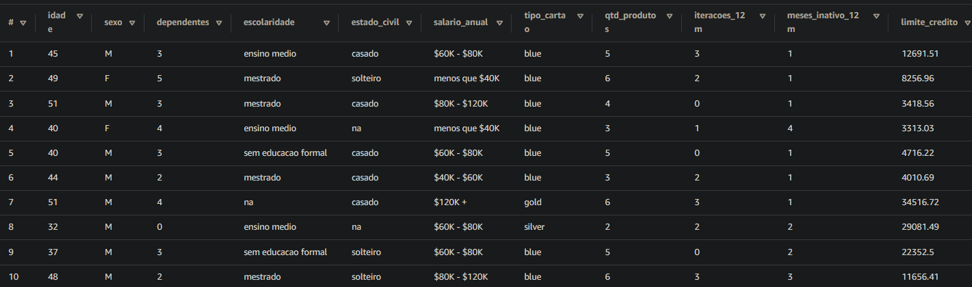

### **2. Tipos de Dados**
A descrição dos tipos de dados foi obtida com:

DESCRIBE credito;

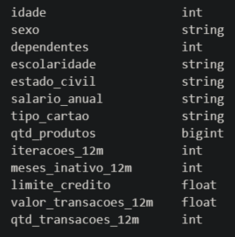

#### Quais são os níveis de escolaridade disponíveis no conjunto de dados? #####

Para saber os níveis de escolaridade usamos a função "distinct"

> Query: SELECT DISTINCT escolaridade FROM credito

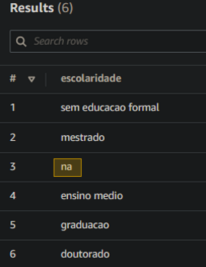

Nota: Veja que neste resultado obtemos um valor nulo, pois provavelmente não foi possível coletá-lo durante a coleta de dados.

#### Quais tipos de estado civil estão disponíveis no conjunto de dados? #####

Para descobrir o estado civil das pessoas em nosso banco de dados, usamos novamente a função "distinct"

> Query: SELECT DISTINCT estado_civil FROM credito

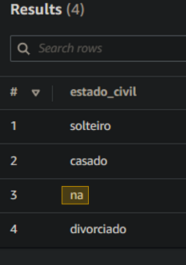

Nota: Novamente obtemos um valor nulo. Devemos ter cuidado para que esses valores não comprometam nossa análise.

Com a função "distinct" exploraremos mais dois tipos de dados, salário anual e cartões

#### Quais tipos de annual_salary estão disponíveis no conjunto de dados? #####

> Query: SELECT DISTINCT salario_anual FROM credito

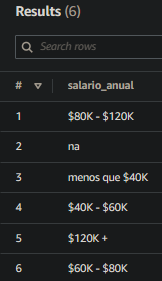

#### Quais são os tipos de cartão disponíveis no conjunto de dados?

> Query: SELECT DISTINCT tipo_cartao FROM credito

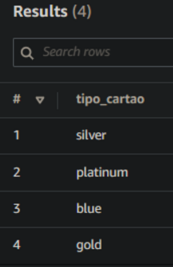

## Análise de Dados

Após explorar nosso banco de dados, iniciamos a análise com os seguintes resultados:

### 1. Quantidade de Pessoas em Cada Faixa Salarial

Query: 
SELECT COUNT(*), salario_anual 
FROM credito 
GROUP BY salario_anual

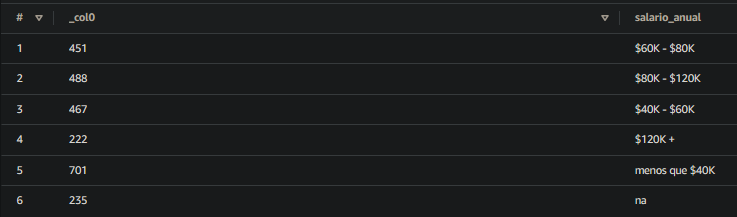

Adicionalmente, é possível ordenar os resultados para melhor compreensão:

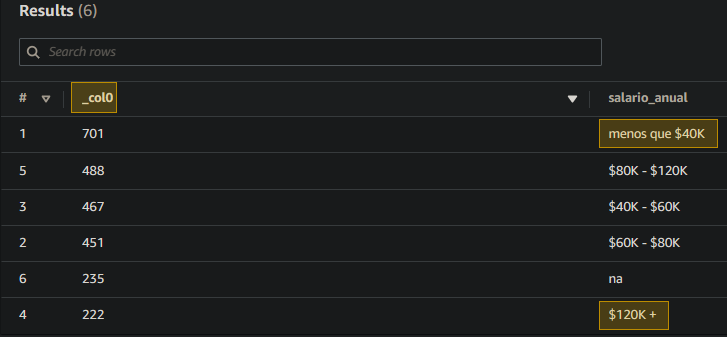 
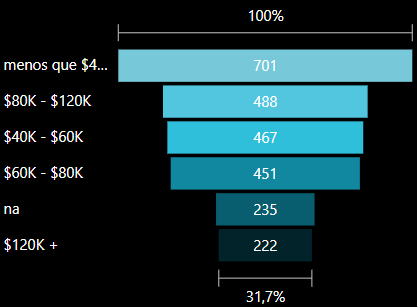
**Resultado:**
- Aproximadamente 27% dos clientes possuem renda inferior a 40K/ano.
- Clientes com renda superior a 120K/ano representam cerca de 8,6% da população.

##### Gostaria de saber quantos homens e mulheres estão no meu banco de dados. #####

> Query: select count(*), sexo from credito group by sexo

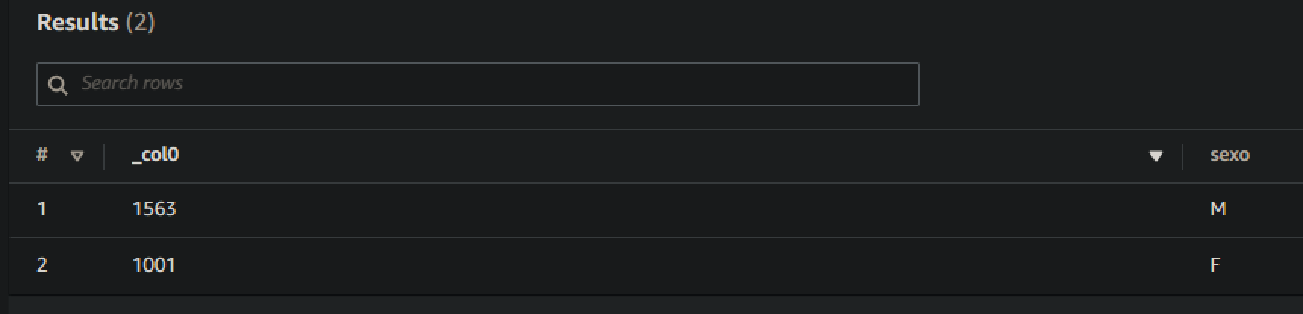

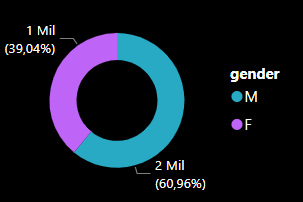

> Resultado: Aproximadamente 61% são homens e 39% são mulheres.

##### Gostaria de saber características das idades dos nossos clientes para melhor tomada de decisão em relação ao marketing. #####

> Query: select avg(idade) as media_idade, min(idade) as min_idade, max(idade) as max_idade, sexo from credito group by sexo

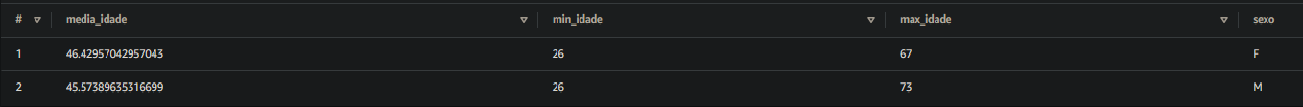

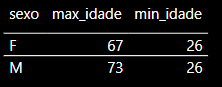

> Resultado: A diferença de idade entre os gêneros é mínima, então você pode focar no mesmo nível de publicidade para ambos.
Como nossa idade mínima é 26 anos, nossa publicidade deve ser direcionada a um público 100% adulto, que tem limite máximo de idade de 67 anos para mulheres e 73 para homens.

##### Gostaria de saber os valores mínimos e máximos das transações realizadas. #####

> Query:  select min(valor_transacoes_12m) as transacao_minima, max(valor_transacoes_12m) as transacao_maxima from credito

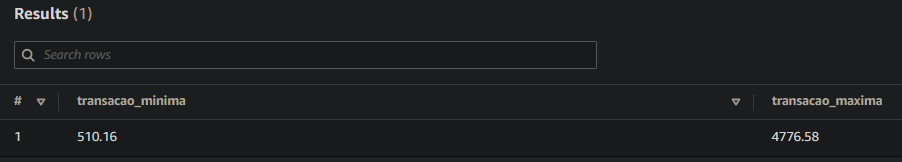

> Resultado: As transações anuais por cliente variam de 510,16 a 5776,58

##### Gostaria de saber quais são as características dos clientes que possuem maiores créditos. #####

> Query: select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito desc 

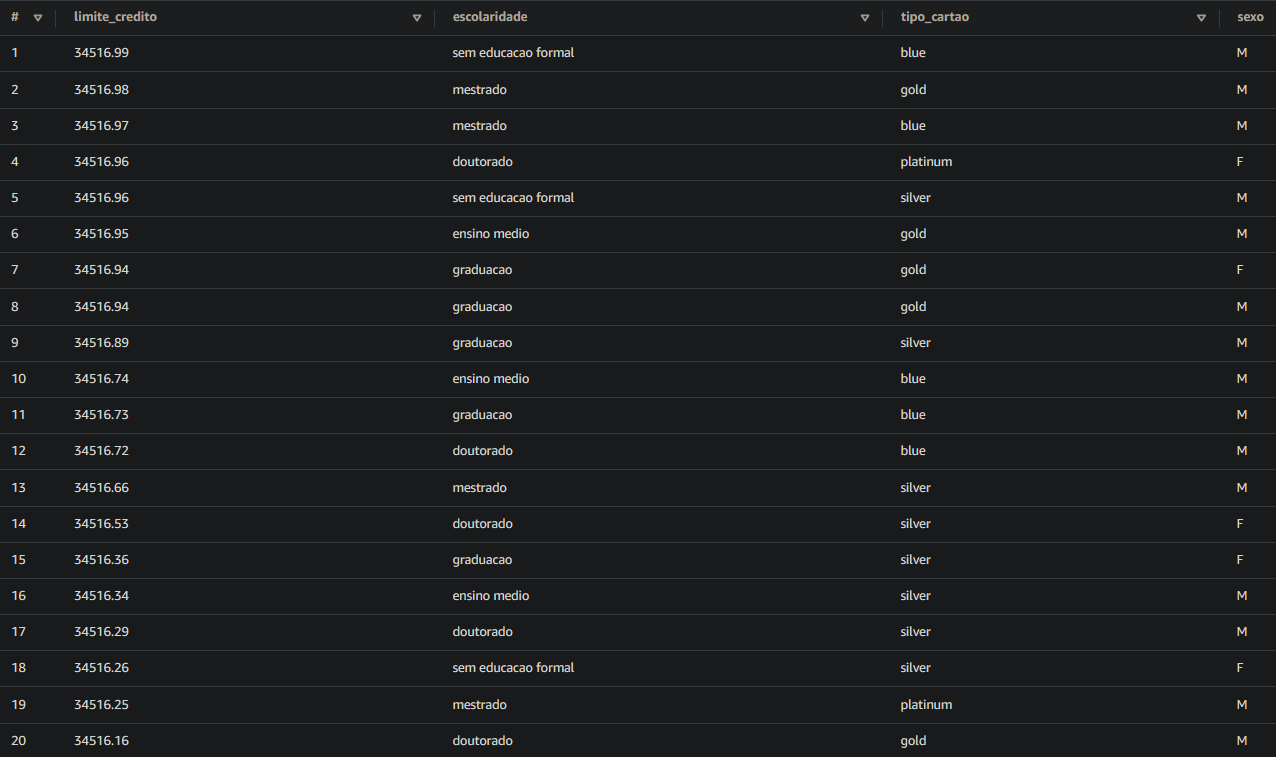

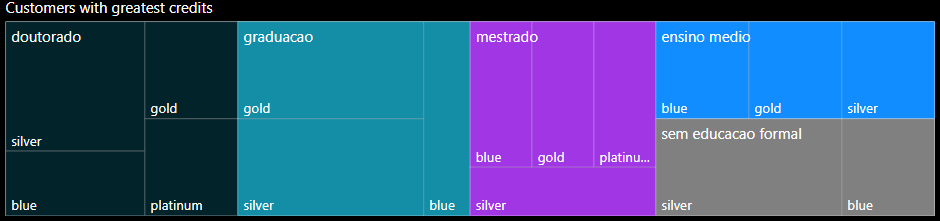

> Resultado: Não parece haver impacto em relação à escolaridade para obtenção de limite de crédito, pois o limite mais alto é oferecido a um homem sem educação formal.
O cartão também parece não ter relação com a escolaridade ou com o limite.
Entre os limites mais altos, encontramos clientes com cartão: ouro, prata, platina e azul

##### Gostaria de saber quais são as características dos clientes que possuem os menores créditos. #####

> Query: select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito asc limit 20

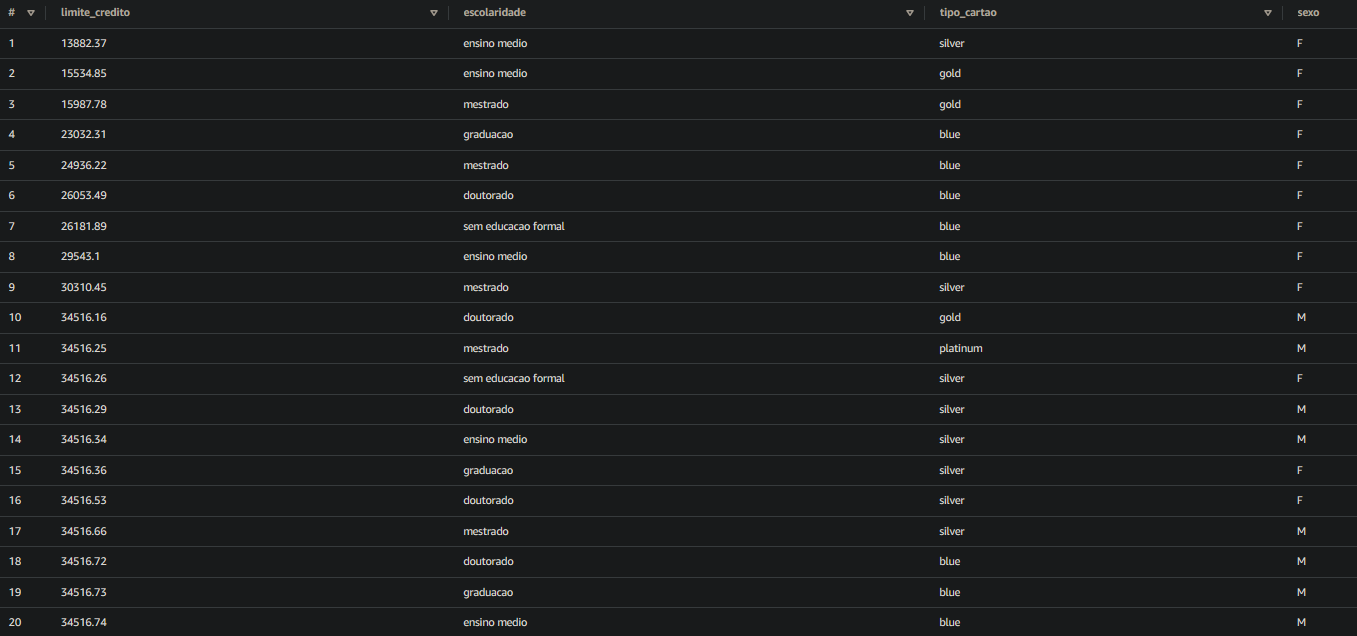

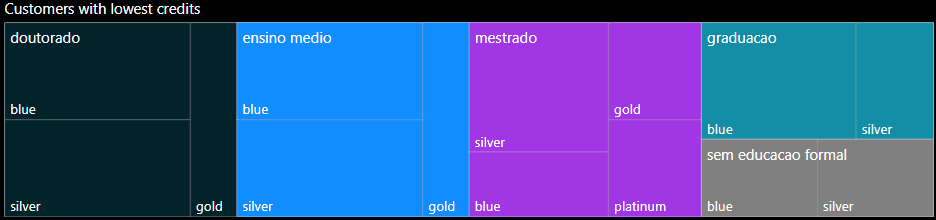

> Resultado: Nesta consulta foi possível detectar que:
> - há apenas um cliente com cartão platinum entre os limites inferiores, ele tem um nível mais alto na categoria master
> - a maioria dos limites inferiores são para mulheres, enquanto os limites superiores são para homens


##### Gostaria de saber qual gênero gasta mais. #####

> Query: select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, sexo from credito group by sexo

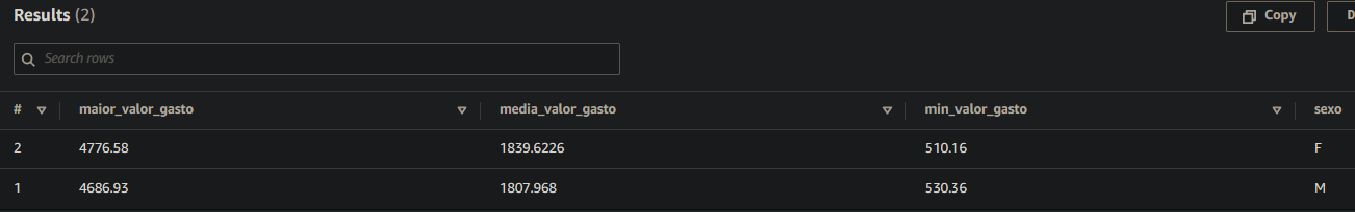

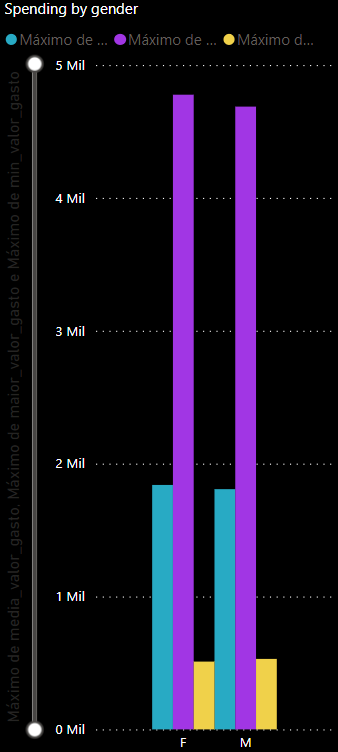

> Resultado: Os gastos para ambos os sexos são semelhantes

##### Gostaria de saber se o valor do salário impacta no limite de crédito disponível. #####

> Query: select avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual from credito where salario_anual != 'na' group by sexo, salario_anual order by avg(valor_transacoes_12m) desc

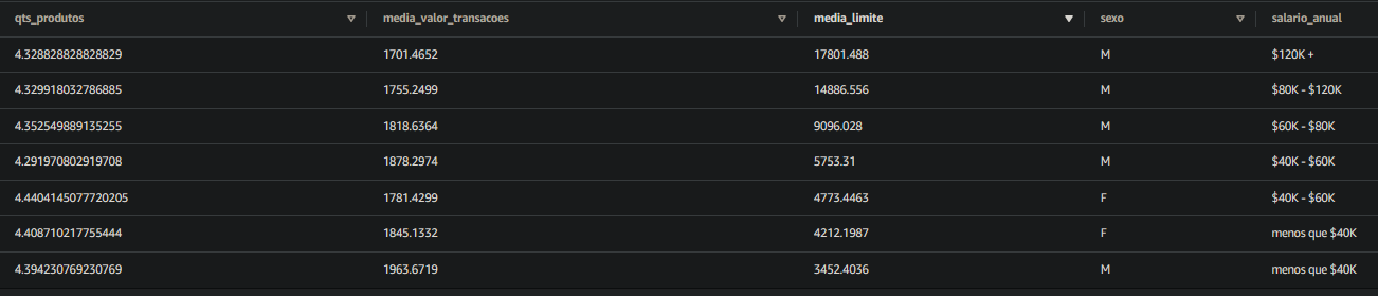

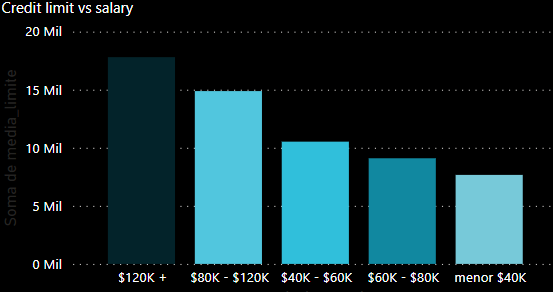

> Resultado: Sim, o salário tem impacto no limite de crédito liberado, pois pessoas com faixa salarial menor também têm limite de crédito menor!

## **Conclusão**

A análise exploratória dos dados bancários revelou importantes padrões de comportamento financeiro:

- A maioria dos clientes tem renda de até 40 mil
- A maioria dos clientes é do sexo masculino!
- A escolaridade não parece influenciar o limite ou o tipo de cartão
- Os clientes com limites mais altos são, em sua maioria, homens
- Os clientes com limites mais baixos são, em sua maioria, mulheres
- Entre os limites mais baixos não há presença de um cartão platinum
- A faixa salarial tem impacto direto no limite de crédito
- Não há clientes do sexo feminino com salário anual acima de 60 mil